Stwórz zbiór danych treningowych i testowych reprezentujący problem klasyfikacji lub regresji (lub wybierz zbiór z repozytorium UCI https://archive.ics.uci.edu/datasets). 
Zaprojektuj model sieci neuronowej do analizy wygenerowanych danyc


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=10, noise=5.0)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - y.min()) / (y.max() - y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

model = create_model()
h = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

results = model.evaluate(X_test, y_test, verbose=0)

print(f"MSE = {results[0]:.4f}")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.3473 - mse: 0.3473 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1713 - mse: 0.1713 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0543 - val_mse: 0.0543
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mse: 0.0130 -

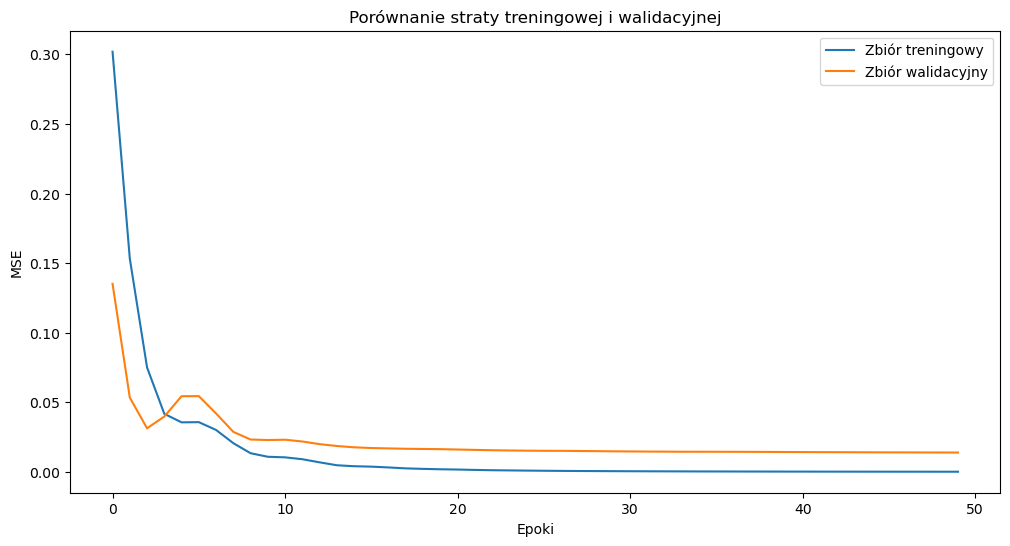

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(h.history['loss'], label='Zbiór treningowy')
plt.plot(h.history['val_loss'], label='Zbiór walidacyjny')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.legend()
plt.title('Porównanie straty treningowej i walidacyjnej')
plt.show()

### Metoda dropout

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.2501 - mse: 0.2501 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1206 - mse: 0.1206 - val_loss: 0.0725 - val_mse: 0.0725
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0434 - mse: 0.0434 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0470 - mse: 0.0470 - val_loss: 0.0469 - val_mse: 0.0469
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0573 - mse: 0.0573 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0336 - val_mse: 0.0336
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0224 - mse: 0.0224 -

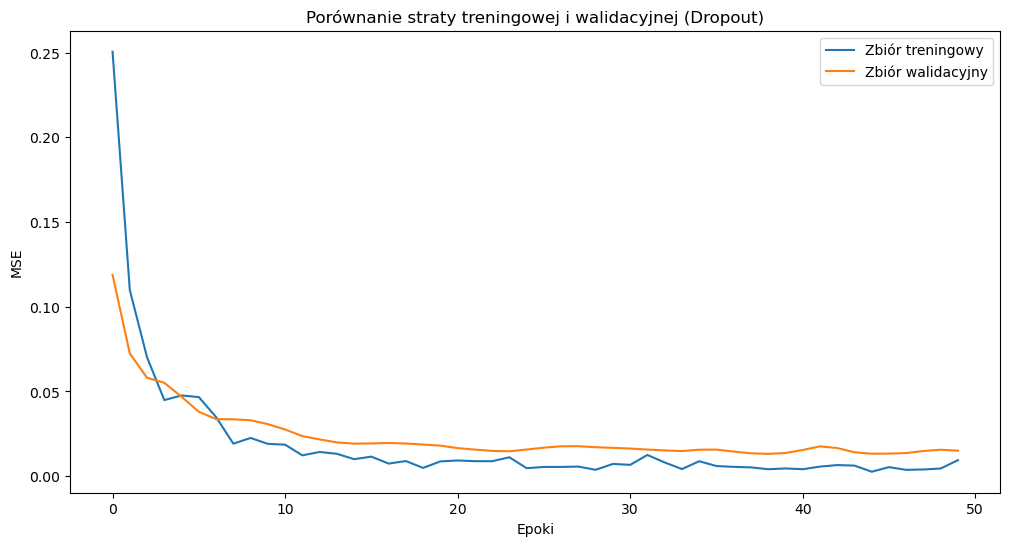

In [3]:
def create_model_with_dropout():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.04),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.04),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.03),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model


model_dropout = create_model_with_dropout()


history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


results_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)


print(f"MSE (dropout) = {results_dropout[0]:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(history_dropout.history['loss'], label='Zbiór treningowy')
plt.plot(history_dropout.history['val_loss'], label='Zbiór walidacyjny')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.legend()
plt.title('Porównanie straty treningowej i walidacyjnej (Dropout)')
plt.show()

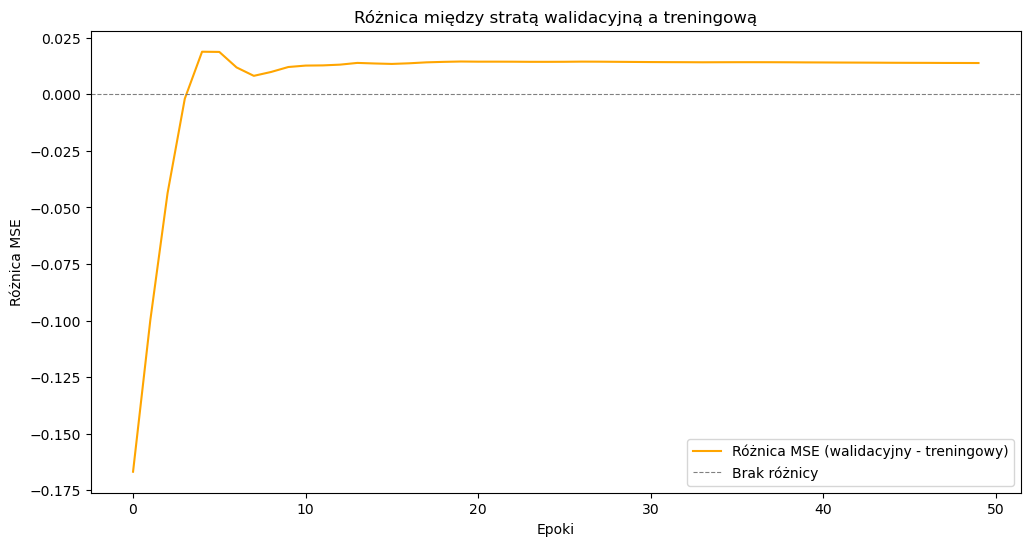

In [4]:
mse_diff = [val - train for train, val in zip(h.history['loss'], h.history['val_loss'])]

plt.figure(figsize=(12, 6))

plt.plot(mse_diff, label='Różnica MSE (walidacyjny - treningowy)', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Brak różnicy')
plt.xlabel('Epoki')
plt.ylabel('Różnica MSE')
plt.legend()
plt.title('Różnica między stratą walidacyjną a treningową')
plt.show()

### Regularyzacja L1

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 9.8054 - mse: 0.3153 - val_loss: 9.5675 - val_mse: 0.2189
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5383 - mse: 0.2270 - val_loss: 9.3179 - val_mse: 0.1491
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.2720 - mse: 0.1414 - val_loss: 9.0904 - val_mse: 0.1054
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0464 - mse: 0.1001 - val_loss: 8.8769 - val_mse: 0.0785
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.8414 - mse: 0.0824 - val_loss: 8.6718 - val_mse: 0.0627
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.6362 - mse: 0.0668 - val_loss: 8.4729 - val_mse: 0.0549
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.4264 - mse: 0.0485 - val_loss: 8.2774 - val_mse: 0.0517
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.2242 - mse: 0.0386 - val_loss: 8.0844 - val_mse: 0.0510
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.0291 - mse: 0.0357 -

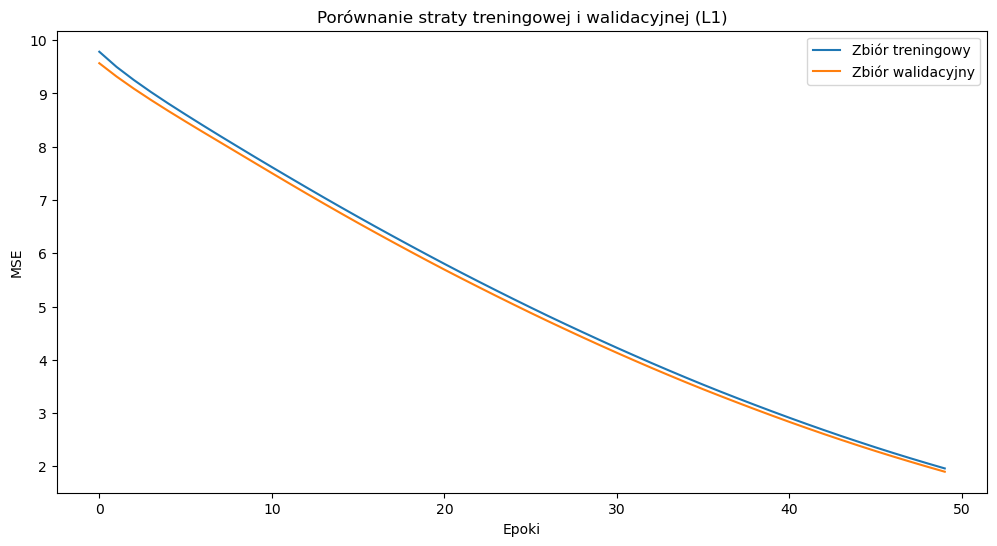

In [5]:
def create_model_with_l1():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

model_l1 = create_model_with_l1()

history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

results_l1 = model_l1.evaluate(X_test, y_test, verbose=0)

print(f"MSE (L1) = {results_l1[0]:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(history_l1.history['loss'], label='Zbiór treningowy')
plt.plot(history_l1.history['val_loss'], label='Zbiór walidacyjny')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.legend()
plt.title('Porównanie straty treningowej i walidacyjnej (L1)')
plt.show()

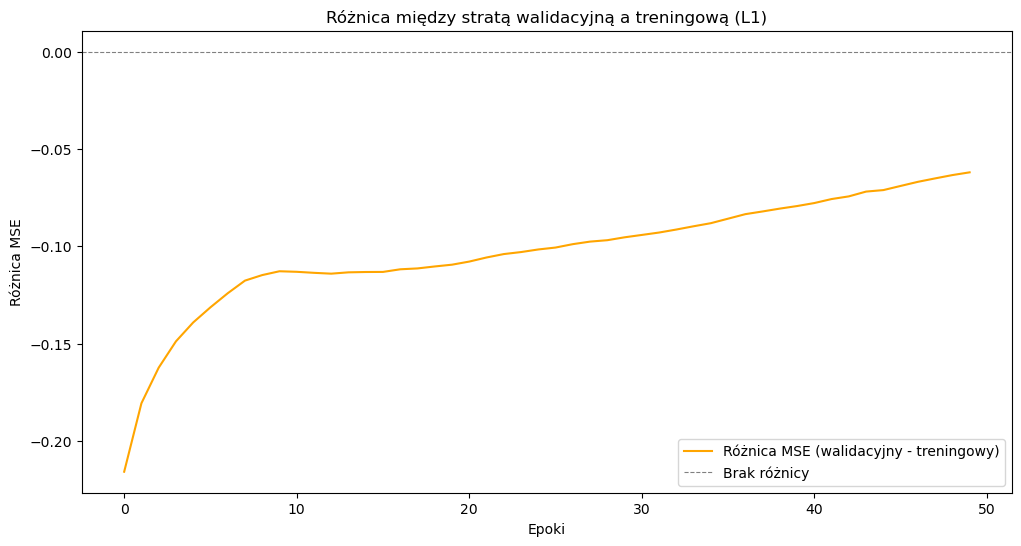

In [6]:
mse_diff = [val - train for train, val in zip(history_l1.history['loss'], history_l1.history['val_loss'])]

plt.figure(figsize=(12, 6))

plt.plot(mse_diff, label='Różnica MSE (walidacyjny - treningowy)', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Brak różnicy')
plt.xlabel('Epoki')
plt.ylabel('Różnica MSE')
plt.legend()
plt.title('Różnica między stratą walidacyjną a treningową (L1)')
plt.show()

### Regularyzacja L2

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 9.4990 - mse: 0.1580 - val_loss: 9.2873 - val_mse: 0.1055
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.2423 - mse: 0.1026 - val_loss: 9.0638 - val_mse: 0.0839
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.0231 - mse: 0.0851 - val_loss: 8.8466 - val_mse: 0.0685
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.7920 - mse: 0.0562 - val_loss: 8.6343 - val_mse: 0.0595
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.5722 - mse: 0.0397 - val_loss: 8.4256 - val_mse: 0.0538
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.3708 - mse: 0.0412 - val_loss: 8.2195 - val_mse: 0.0505
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.1536 - mse: 0.0269 - val_loss: 8.0148 - val_mse: 0.0484
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9520 - mse: 0.0277 - val_loss: 7.8113 - val_mse: 0.0466
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.7531 - mse: 0.0302 -

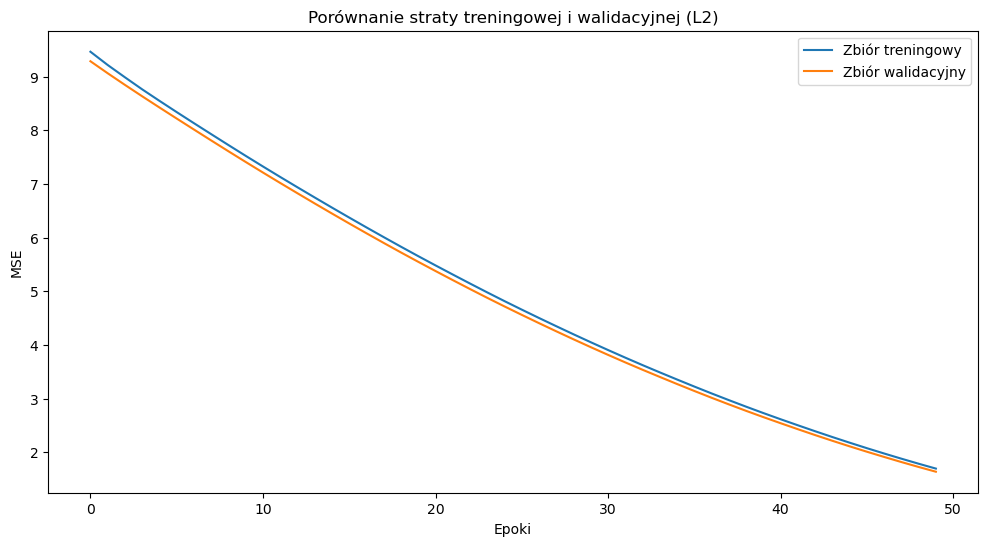

In [7]:
def create_model_with_l2():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                              kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

model_l2 = create_model_with_l1()

history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

results_l2 = model_l2.evaluate(X_test, y_test, verbose=0)

print(f"MSE (L2) = {results_l2[0]:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(history_l2.history['loss'], label='Zbiór treningowy')
plt.plot(history_l2.history['val_loss'], label='Zbiór walidacyjny')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.legend()
plt.title('Porównanie straty treningowej i walidacyjnej (L2)')
plt.show()

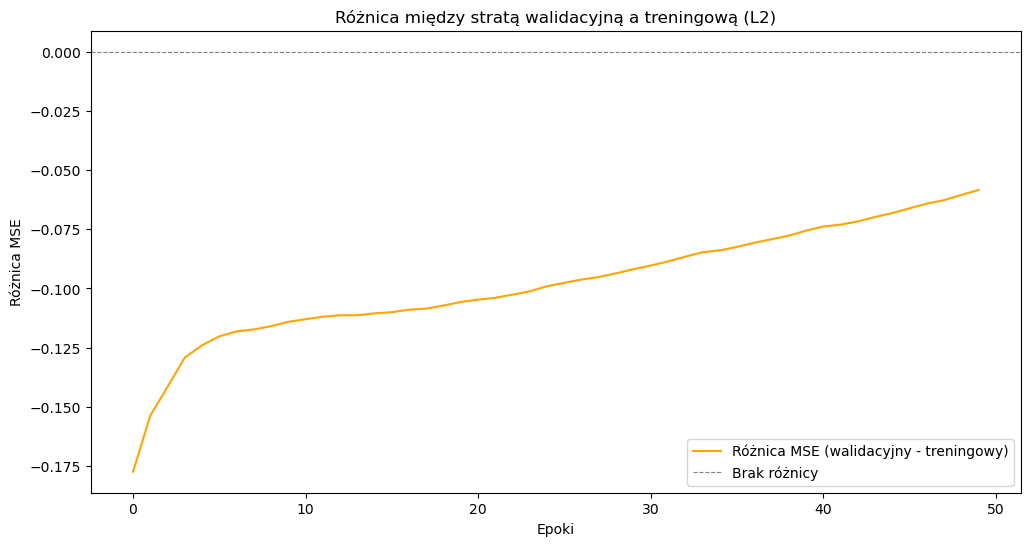

In [8]:
mse_diff = [val - train for train, val in zip(history_l2.history['loss'], history_l2.history['val_loss'])]

plt.figure(figsize=(12, 6))

plt.plot(mse_diff, label='Różnica MSE (walidacyjny - treningowy)', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Brak różnicy')
plt.xlabel('Epoki')
plt.ylabel('Różnica MSE')
plt.legend()
plt.title('Różnica między stratą walidacyjną a treningową (L2)')
plt.show()